<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# No: 27
# Kelas: TI-3A
# NIM: 2241720045
# F. TUGAS PRAKTIKUM

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut
- Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


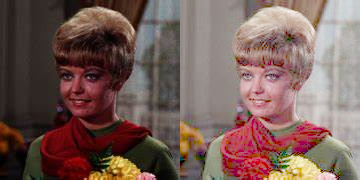

In [4]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/dataset/female.tiff')
gamma_img = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      gamma_img[y,x,c]= np.clip(255*pow(img[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((img, gamma_img))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
- Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.
- Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

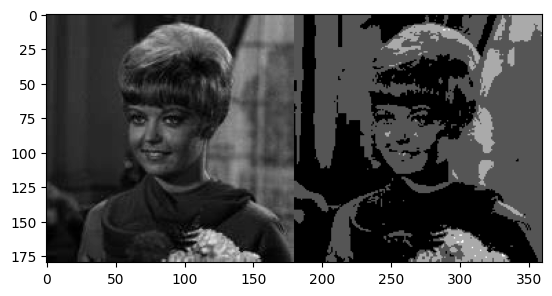

In [5]:
bit_depth=2
level = 255 / (pow(2, bit_depth)-1)
img = cv.imread('/content/drive/MyDrive/dataset/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    depth_image[y,x]=np.clip(round(img[y,x]/level)*level,0,255)

final_frame = cv.hconcat((img, depth_image))
plt.imshow(final_frame, cmap='gray')

3. Buat modul Avarage Denoising
- Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.
- Citra asli sudah disediakan pada /images/galaxy.jpg.
- 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
- Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

In [6]:
import cv2 as cv
import numpy as np
import os

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/dataset/galaxy.jpg')

# Cek apakah direktori output sudah ada atau belum
output_dir = '/content/drive/MyDrive/dataset/noises'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Generate 30 gambar noise dengan operasi Average Denoising
for i in range(100):
    # Tambahkan noise Gaussian ke gambar asli
    noise = np.random.normal(0, 25, original.shape).astype(np.uint8)
    noisy_image = cv.add(original, noise)

    # Simpan gambar dengan noise
    cv.imwrite(f'{output_dir}/noisy_{i + 1}.jpg', noisy_image)


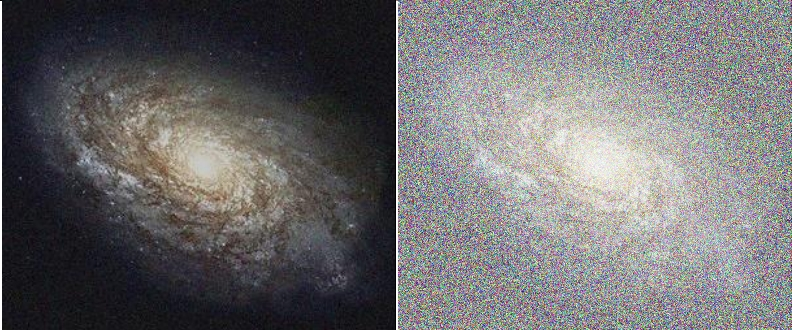

Nilai PSNR adalah 27.95083990385575 (dB)
Nilai MSE adalah 104.23087184981124


In [7]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/dataset/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/dataset/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

   Jumlah Citra di Average  Nilai PSNR (dB)   Nilai MSE
0                        5        27.964792  103.896546
1                       10        28.068852  101.436700
2                       20        28.161101   99.304816
3                       40        28.194575   98.542340
4                       80        28.156696   99.405571
5                      100        28.118731  100.278380


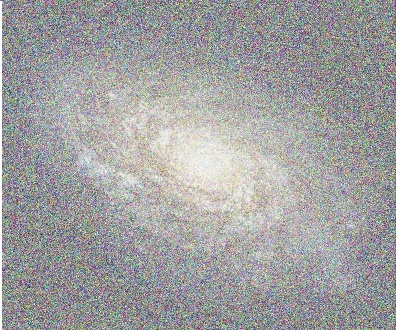

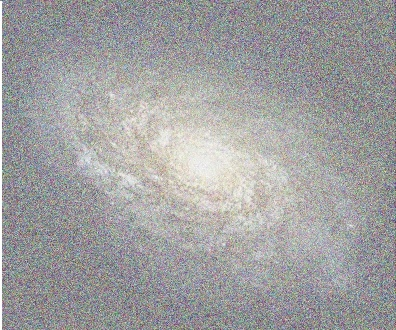

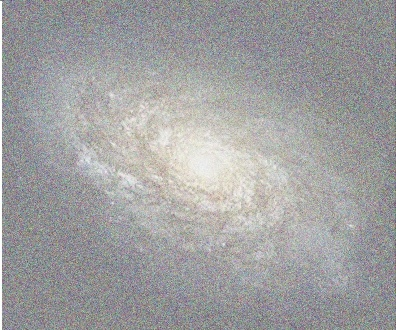

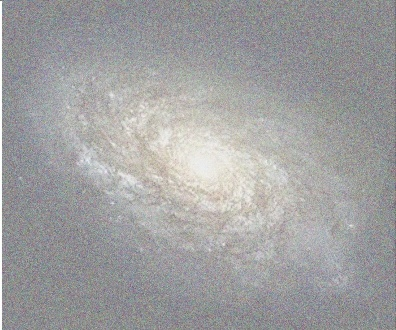

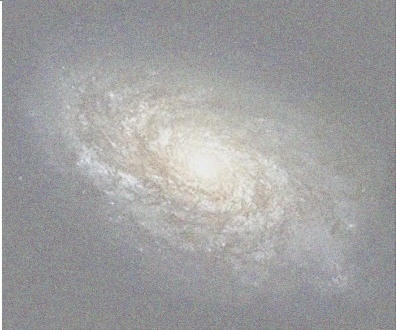

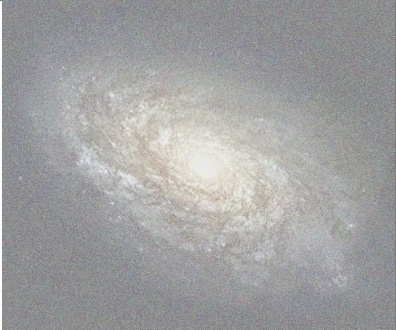

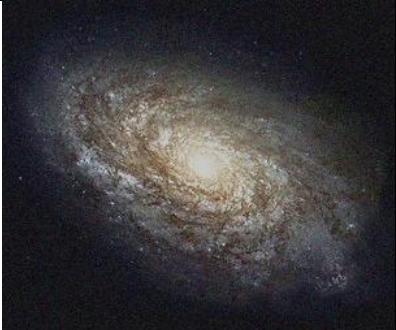

In [8]:
import cv2 as cv
import glob
import numpy as np
import pandas as pd
from math import log10, sqrt
from google.colab.patches import cv2_imshow  # Import untuk menampilkan gambar di Colab
import os

# Fungsi untuk menghitung nilai PSNR dan MSE
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:  # MSE 0 berarti tidak ada noise sama sekali
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/dataset/galaxy.jpg')

# Membaca gambar noisy yang telah di-generate
output_dir = '/content/drive/MyDrive/dataset/noises'
cv_img = []
for img in glob.glob(f'{output_dir}/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar jumlah citra yang akan digunakan untuk averaging
num_images_to_average = [5, 10, 20, 40, 80, 100]
results = []

# Melakukan averaging untuk setiap jumlah citra
for num in num_images_to_average:
    if num > len(cv_img):
        print(f'Jumlah citra {num} melebihi jumlah citra yang tersedia.')
        continue

    dst = cv_img[0]
    for i in range(num):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    # Menghitung PSNR dan MSE
    psnr, mse = PSNR(original, dst)

    # Simpan hasil ke dalam daftar
    results.append({'Jumlah Citra di Average': num,
                    'Nilai PSNR (dB)': psnr,
                    'Nilai MSE': mse})

    # Simpan hasil gambar denoised
    cv.imwrite(f'{output_dir}/denoised_average_{num}.jpg', dst)

# Membuat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil
print(results_df)

# Menampilkan gambar hasil
for result in results:
    num = result['Jumlah Citra di Average']
    denoised_image = cv.imread(f'{output_dir}/denoised_average_{num}.jpg')
    cv2_imshow(denoised_image)  # Menggunakan cv2_imshow untuk menampilkan gambar

cv2_imshow(original)  # Menampilkan gambar asli


Dari hasil PSNR yang dicatat dalam tabel di atas, kita dapat menarik beberapa kesimpulan sebagai berikut:

1. **PSNR Menurun dengan Peningkatan Jumlah Citra:**
   - Nilai PSNR cenderung menurun saat jumlah citra yang dirata-ratakan bertambah, terutama dari 40 ke 80 citra. Ini menunjukkan bahwa ada penurunan kualitas dalam proses denoising ketika lebih banyak citra diambil, yang mungkin disebabkan oleh variabilitas noise dalam citra yang berbeda.

2. **Kualitas Denoising Optimal pada Jumlah Citra Tertentu:**
   - Meskipun nilai PSNR tidak menunjukkan peningkatan signifikan seiring bertambahnya jumlah citra, jumlah citra 20 dan 40 tampaknya memberikan hasil yang lebih baik dibandingkan dengan 5 dan 10 citra. Ini menunjukkan bahwa ada titik optimal untuk jumlah citra yang dirata-ratakan untuk mendapatkan hasil denoising yang lebih baik.

3. **MSE Relatif Stabil:**
   - Nilai MSE (Mean Squared Error) menunjukkan fluktuasi kecil, tetapi tetap berada pada kisaran yang relatif stabil. MSE yang lebih rendah biasanya menunjukkan bahwa hasil denoising lebih mendekati gambar asli, namun PSNR yang tidak konsisten mengindikasikan bahwa kualitas visual dapat bervariasi meskipun MSE terlihat baik.

4. **Trade-off antara Kualitas dan Noise:**
   - Peningkatan jumlah citra tidak selalu menjamin kualitas yang lebih baik dalam hal PSNR. Ini menunjukkan bahwa meskipun lebih banyak data dapat membantu mengurangi noise, pengaruh noise dalam gambar yang berbeda dapat menyebabkan trade-off dalam hasil akhir.

### Kesimpulan:
Secara keseluruhan, hasil PSNR menunjukkan bahwa proses averaging dapat membantu mengurangi noise, tetapi efektivitasnya dapat bervariasi tergantung pada jumlah citra yang dirata-ratakan. Ada titik optimal di mana denoising berfungsi paling baik, dan peningkatan jumlah citra tidak selalu menghasilkan peningkatan kualitas yang diharapkan. Oleh karena itu, penting untuk mengevaluasi baik PSNR maupun MSE dalam konteks visual yang lebih luas saat melakukan analisis hasil denoising.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)